In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import random

import os

In [2]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasCha")
os.getcwd()

'/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasCha'

In [4]:
alfa_1=-2.37
A_1=7.5
Er_1=0.47

alfa_2=-2.7
A_2=5.5
Er_2=0.48

alfa_3=-3.37
A_3=2.75
Er_3=0.48

alfa_4=-5.43
A_4=0.409
Er_4=0.475

In [5]:
A=1E-5*A_1/(Er_2**alfa_2)
print(A)

1.0337430537091583e-05


In [6]:
E2=1**(alfa_2+1)
print(E2)

1.0


In [7]:
E1=0.2**(alfa_2+1)
print(E1)

15.425846568000244


In [8]:
A*(E2-E1)/(alfa_2+1)

8.77212863737903e-05

In [9]:
F1=A_1*1E-5*(10**(alfa_1+1)-0.2**(alfa_1+1))/((alfa_1+1)*(Er_1**alfa_1))
F2=A_2*1E-5*(10**(alfa_2+1)-0.2**(alfa_2+1))/((alfa_2+1)*(Er_2**alfa_2))
F3=A_3*1E-5*(10**(alfa_3+1)-0.2**(alfa_3+1))/((alfa_3+1)*(Er_3**alfa_3))
F4=A_4*1E-5*(10**(alfa_4+1)-0.2**(alfa_4+1))/((alfa_4+1)*(Er_4**alfa_4))

In [10]:
print(r"flujo para alfa = -2.37 =", F1, "particulas/m2*s")
print(r"flujo para alfa = -2.70 =", F2, "particulas/m2*s")
print(r"flujo para alfa = -3.37 =", F3, "particulas/m2*s")
print(r"flujo para alfa = -5.43 =", F4, "particulas/m2*s")

flujo para alfa = -2.37 = 8.255702792638225e-05 particulas/m2*s
flujo para alfa = -2.70 = 6.869925269347517e-05 particulas/m2*s
flujo para alfa = -3.37 = 4.434915740109312e-05 particulas/m2*s
flujo para alfa = -5.43 = 2.023964954624724e-05 particulas/m2*s


In [11]:
#Calculo flujo en lo alto de la atmosfera
h=110000

F1t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F1
F2t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F2
F3t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F3
F4t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F4

In [12]:
h*np.tan(0.1*np.pi/180)

191.98641266076805

In [13]:
print(r"flujo para alfa = -2.37 =", F1t, "particulas/s")
print(r"flujo para alfa = -2.70 =", F2t, "particulas/s")
print(r"flujo para alfa = -3.37 =", F3t, "particulas/s")
print(r"flujo para alfa = -5.43 =", F4t, "particulas/s")

flujo para alfa = -2.37 = 956.163651711296 particulas/s
flujo para alfa = -2.70 = 795.6648873528412 particulas/s
flujo para alfa = -3.37 = 513.6455775607824 particulas/s
flujo para alfa = -5.43 = 234.41271694947127 particulas/s


## Flujo Chacaltaya

In [14]:
dc=pd.read_csv(r"salida_cha.hst", delimiter=" ")

In [15]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  82 non-null     float64
 1   N_phot         82 non-null     float64
 2   N_e+           82 non-null     float64
 3   N_e-           82 non-null     float64
 4   N_mu+          82 non-null     float64
 5   N_mu-          82 non-null     float64
 6   N_pi0          82 non-null     float64
 7   N_pi+          82 non-null     float64
 8   N_pi-          82 non-null     float64
 9   N_n            82 non-null     float64
 10  N_p            82 non-null     float64
 11  N_pbar         82 non-null     float64
 12  N_others       82 non-null     float64
 13  Total_per_bin  82 non-null     float64
dtypes: float64(14)
memory usage: 9.1 KB


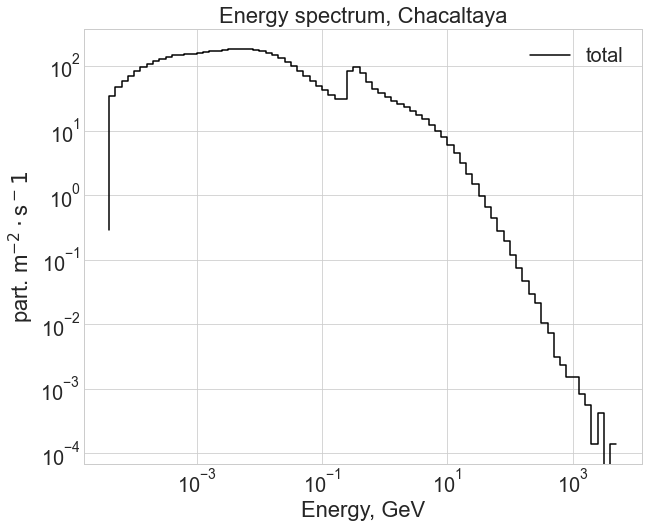

In [16]:
plt.figure(figsize=(10,8))

plt.step(dc["p_in_bin(GeV)"], dc["Total_per_bin"]/7200, c="k", label=r"total")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [17]:
def norm(x,y,z):
    for i in range(0, len(x)-1):
        k=y[i]/(x[i+1]-x[i])
        z.append(k)

In [18]:
dc_x=dc["p_in_bin(GeV)"]
dc_y=dc["Total_per_bin"]/7200
dc_z=[]
norm(dc_x, dc_y, dc_z)

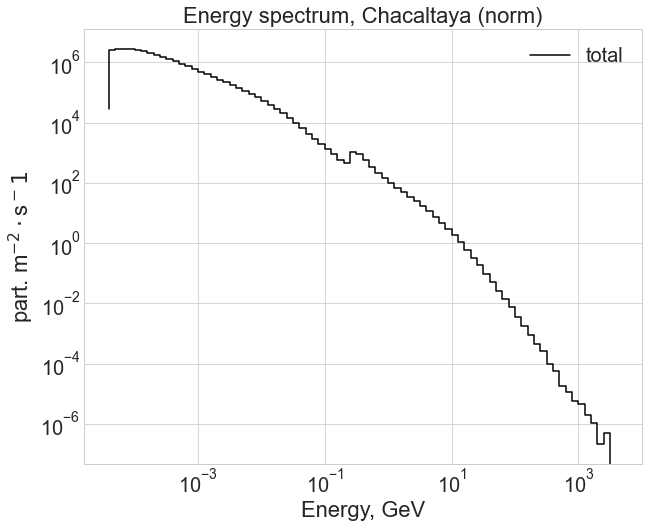

In [19]:
plt.figure(figsize=(10,8))

plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya (norm)", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

## GRB para $\alpha$ = -2.2

### Simulaciones

- 50.000 fotones
- Energía 0.2 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.2
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [20]:
ds1=pd.read_csv(r"salida_22_200_400.hst", delimiter=" ")

In [21]:
ds2=pd.read_csv(r"salida_22_400_700.hst", delimiter=" ")

In [22]:
ds3=pd.read_csv(r"salida_22_700_1000.hst", delimiter=" ")

In [23]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  70 non-null     float64
 1   N_phot         70 non-null     float64
 2   N_e+           70 non-null     float64
 3   N_e-           70 non-null     float64
 4   N_mu+          70 non-null     float64
 5   N_mu-          70 non-null     float64
 6   N_pi0          70 non-null     float64
 7   N_pi+          70 non-null     float64
 8   N_pi-          70 non-null     float64
 9   N_n            70 non-null     float64
 10  N_p            70 non-null     float64
 11  N_pbar         70 non-null     float64
 12  N_others       70 non-null     float64
 13  Total_per_bin  70 non-null     float64
dtypes: float64(14)
memory usage: 7.8 KB


In [24]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  71 non-null     float64
 1   N_phot         71 non-null     float64
 2   N_e+           71 non-null     float64
 3   N_e-           71 non-null     float64
 4   N_mu+          71 non-null     float64
 5   N_mu-          71 non-null     float64
 6   N_pi0          71 non-null     float64
 7   N_pi+          71 non-null     float64
 8   N_pi-          71 non-null     float64
 9   N_n            71 non-null     float64
 10  N_p            71 non-null     float64
 11  N_pbar         71 non-null     float64
 12  N_others       71 non-null     float64
 13  Total_per_bin  71 non-null     float64
dtypes: float64(14)
memory usage: 7.9 KB


In [25]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  74 non-null     float64
 1   N_phot         74 non-null     float64
 2   N_e+           74 non-null     float64
 3   N_e-           74 non-null     float64
 4   N_mu+          74 non-null     float64
 5   N_mu-          74 non-null     float64
 6   N_pi0          74 non-null     float64
 7   N_pi+          74 non-null     float64
 8   N_pi-          74 non-null     float64
 9   N_n            74 non-null     float64
 10  N_p            74 non-null     float64
 11  N_pbar         74 non-null     float64
 12  N_others       74 non-null     float64
 13  Total_per_bin  74 non-null     float64
dtypes: float64(14)
memory usage: 8.2 KB


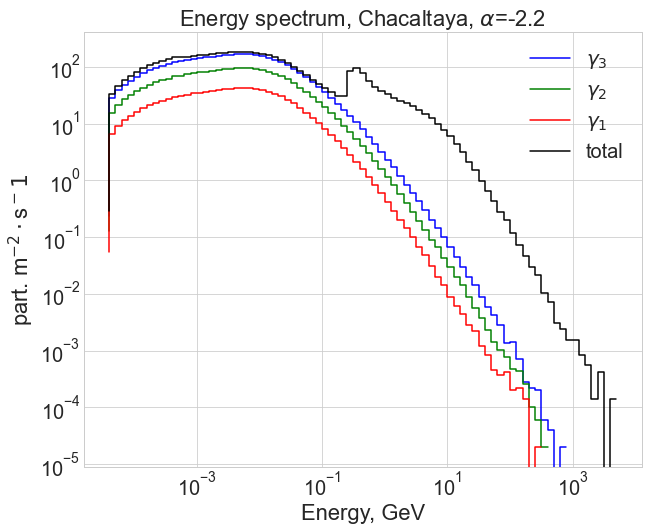

In [26]:
plt.figure(figsize=(10,8))
plt.step(ds3["p_in_bin(GeV)"], ds3["Total_per_bin"]/50000, c="b", label=r"$\gamma_3$")
plt.step(ds2["p_in_bin(GeV)"], ds2["Total_per_bin"]/50000, c="g", label=r"$\gamma_2$")
plt.step(ds1["p_in_bin(GeV)"], ds1["Total_per_bin"]/50000, c="r", label=r"$\gamma_1$")

plt.step(dc["p_in_bin(GeV)"], dc["Total_per_bin"]/7200, c="k", label=r"total")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya, $\alpha$=-2.2", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [27]:
g123=ds1["Total_per_bin"]*0.6586 + ds2["Total_per_bin"]*0.2468 +ds3["Total_per_bin"]*0.0946

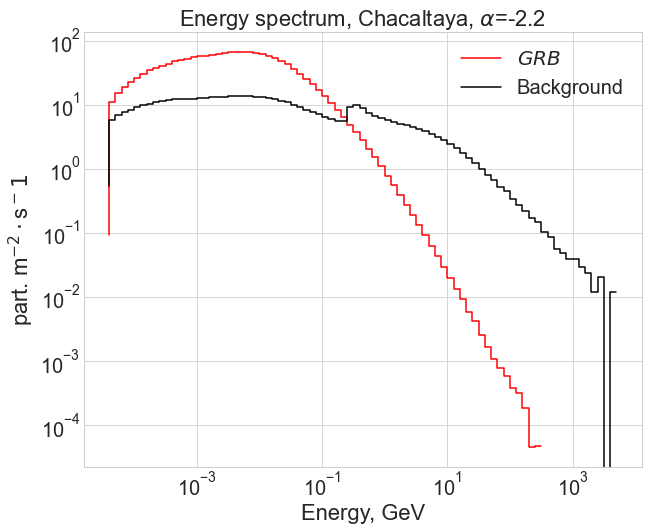

In [28]:
plt.figure(figsize=(10,8))
plt.step(ds3["p_in_bin(GeV)"], g123/50000, c="r", label=r"$GRB$")

plt.step(dc["p_in_bin(GeV)"], np.sqrt(dc["Total_per_bin"]/7200), c="k", label=r"Background")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya, $\alpha$=-2.2", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [29]:
dc_x=dc["p_in_bin(GeV)"]
dc_y=np.sqrt(dc["Total_per_bin"]/7200)
dc_z=[]
norm(dc_x, dc_y, dc_z)

In [30]:
ds_x=ds3["p_in_bin(GeV)"]
ds_y=g123/50000
ds_z=[]
norm(ds_x, ds_y, ds_z)

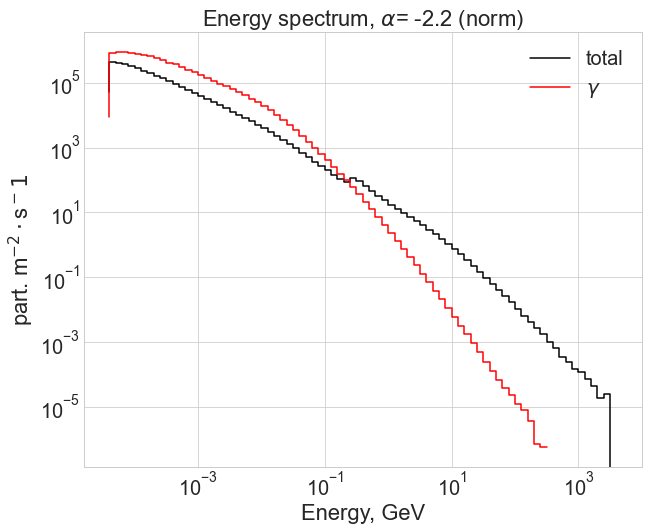

In [31]:
plt.figure(figsize=(10,8))

plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")
plt.step(ds3["p_in_bin(GeV)"][:-1], ds_z, c="r", label=r"$\gamma$")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, $\alpha$= -2.2 (norm)", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

## GRB para $\alpha$ = -2.7

### Simulaciones

- 50.000 fotones
- Energía 0.2 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.2
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [32]:
dt1=pd.read_csv(r"salida_27_200_400.hst", delimiter=" ")

In [33]:
dt2=pd.read_csv(r"salida_27_400_700.hst", delimiter=" ")

In [34]:
dt3=pd.read_csv(r"salida_27_700_1000.hst", delimiter=" ")

In [35]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  68 non-null     float64
 1   N_phot         68 non-null     float64
 2   N_e+           68 non-null     float64
 3   N_e-           68 non-null     float64
 4   N_mu+          68 non-null     float64
 5   N_mu-          68 non-null     float64
 6   N_pi0          68 non-null     float64
 7   N_pi+          68 non-null     float64
 8   N_pi-          68 non-null     float64
 9   N_n            68 non-null     float64
 10  N_p            68 non-null     float64
 11  N_pbar         68 non-null     float64
 12  N_others       68 non-null     float64
 13  Total_per_bin  68 non-null     float64
dtypes: float64(14)
memory usage: 7.6 KB


In [36]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  72 non-null     float64
 1   N_phot         72 non-null     float64
 2   N_e+           72 non-null     float64
 3   N_e-           72 non-null     float64
 4   N_mu+          72 non-null     float64
 5   N_mu-          72 non-null     float64
 6   N_pi0          72 non-null     float64
 7   N_pi+          72 non-null     float64
 8   N_pi-          72 non-null     float64
 9   N_n            72 non-null     float64
 10  N_p            72 non-null     float64
 11  N_pbar         72 non-null     float64
 12  N_others       72 non-null     float64
 13  Total_per_bin  72 non-null     float64
dtypes: float64(14)
memory usage: 8.0 KB


In [37]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  73 non-null     float64
 1   N_phot         73 non-null     float64
 2   N_e+           73 non-null     float64
 3   N_e-           73 non-null     float64
 4   N_mu+          73 non-null     float64
 5   N_mu-          73 non-null     float64
 6   N_pi0          73 non-null     float64
 7   N_pi+          73 non-null     float64
 8   N_pi-          73 non-null     float64
 9   N_n            73 non-null     float64
 10  N_p            73 non-null     float64
 11  N_pbar         73 non-null     float64
 12  N_others       73 non-null     float64
 13  Total_per_bin  73 non-null     float64
dtypes: float64(14)
memory usage: 8.1 KB


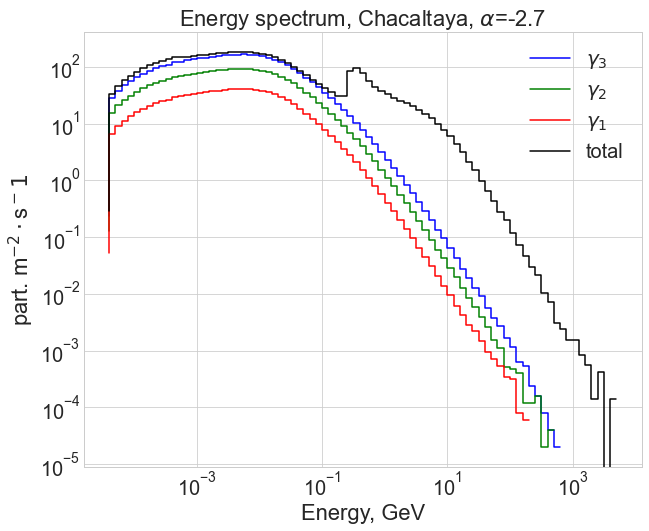

In [38]:
plt.figure(figsize=(10,8))
plt.step(dt3["p_in_bin(GeV)"], dt3["Total_per_bin"]/50000, c="b", label=r"$\gamma_3$")
plt.step(dt2["p_in_bin(GeV)"], dt2["Total_per_bin"]/50000, c="g", label=r"$\gamma_2$")
plt.step(dt1["p_in_bin(GeV)"], dt1["Total_per_bin"]/50000, c="r", label=r"$\gamma_1$")

plt.step(dc["p_in_bin(GeV)"], dc["Total_per_bin"]/7200, c="k", label=r"total")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya, $\alpha$=-2.7", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [39]:
gg123=dt1["Total_per_bin"]*0.7353 + dt2["Total_per_bin"]*0.2089 +dt3["Total_per_bin"]*0.0588

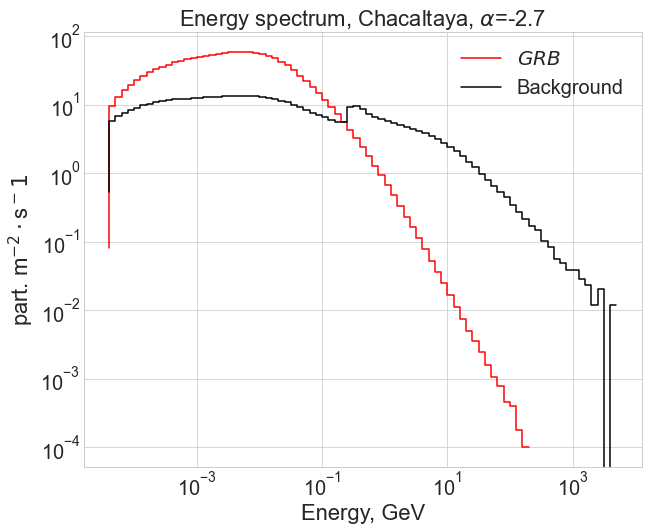

In [40]:
plt.figure(figsize=(10,8))
plt.step(dt3["p_in_bin(GeV)"], gg123/50000, c="r", label=r"$GRB$")

plt.step(dc["p_in_bin(GeV)"], np.sqrt(dc["Total_per_bin"]/7200), c="k", label=r"Background")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya, $\alpha$=-2.7", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [41]:
dt_x=dt3["p_in_bin(GeV)"]
dt_y=gg123/50000
dt_z=[]
norm(dt_x, dt_y, dt_z)

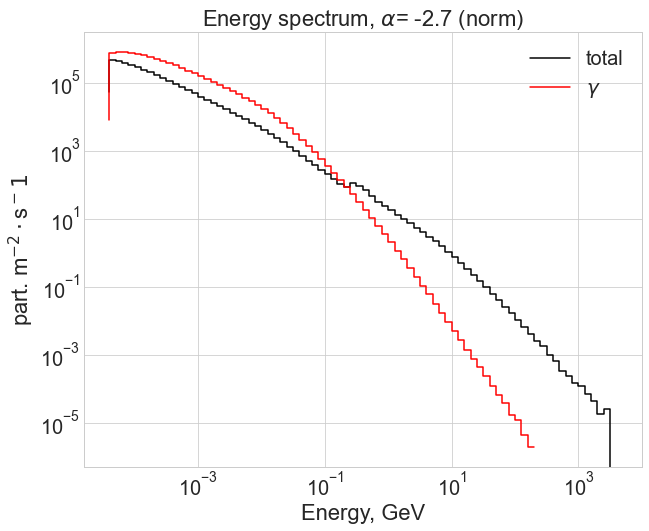

In [42]:
plt.figure(figsize=(10,8))

plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")
plt.step(dt3["p_in_bin(GeV)"][:-1], dt_z, c="r", label=r"$\gamma$")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, $\alpha$= -2.7 (norm)", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

## GRB para $\alpha$ = -3.37

### Simulaciones

- 50.000 fotones
- Energía 0.2 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.2
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [43]:
du1=pd.read_csv(r"salida_33_200_400.hst", delimiter=" ")

In [44]:
du2=pd.read_csv(r"salida_33_400_700.hst", delimiter=" ")

In [45]:
du3=pd.read_csv(r"salida_33_700_1000.hst", delimiter=" ")

In [46]:
du1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  68 non-null     float64
 1   N_phot         68 non-null     float64
 2   N_e+           68 non-null     float64
 3   N_e-           68 non-null     float64
 4   N_mu+          68 non-null     float64
 5   N_mu-          68 non-null     float64
 6   N_pi0          68 non-null     float64
 7   N_pi+          68 non-null     float64
 8   N_pi-          68 non-null     float64
 9   N_n            68 non-null     float64
 10  N_p            68 non-null     float64
 11  N_pbar         68 non-null     float64
 12  N_others       68 non-null     float64
 13  Total_per_bin  68 non-null     float64
dtypes: float64(14)
memory usage: 7.6 KB


In [47]:
du2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  73 non-null     float64
 1   N_phot         73 non-null     float64
 2   N_e+           73 non-null     float64
 3   N_e-           73 non-null     float64
 4   N_mu+          73 non-null     float64
 5   N_mu-          73 non-null     float64
 6   N_pi0          73 non-null     float64
 7   N_pi+          73 non-null     float64
 8   N_pi-          73 non-null     float64
 9   N_n            73 non-null     float64
 10  N_p            73 non-null     float64
 11  N_pbar         73 non-null     float64
 12  N_others       73 non-null     float64
 13  Total_per_bin  73 non-null     float64
dtypes: float64(14)
memory usage: 8.1 KB


In [48]:
du3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p_in_bin(GeV)  74 non-null     float64
 1   N_phot         74 non-null     float64
 2   N_e+           74 non-null     float64
 3   N_e-           74 non-null     float64
 4   N_mu+          74 non-null     float64
 5   N_mu-          74 non-null     float64
 6   N_pi0          74 non-null     float64
 7   N_pi+          74 non-null     float64
 8   N_pi-          74 non-null     float64
 9   N_n            74 non-null     float64
 10  N_p            74 non-null     float64
 11  N_pbar         74 non-null     float64
 12  N_others       74 non-null     float64
 13  Total_per_bin  74 non-null     float64
dtypes: float64(14)
memory usage: 8.2 KB


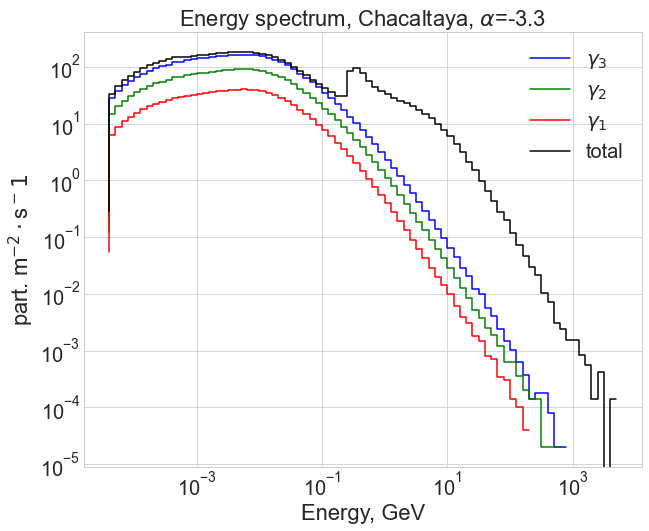

In [49]:
plt.figure(figsize=(10,8))
plt.step(du3["p_in_bin(GeV)"], du3["Total_per_bin"]/50000, c="b", label=r"$\gamma_3$")
plt.step(du2["p_in_bin(GeV)"], du2["Total_per_bin"]/50000, c="g", label=r"$\gamma_2$")
plt.step(du1["p_in_bin(GeV)"], du1["Total_per_bin"]/50000, c="r", label=r"$\gamma_1$")

plt.step(dc["p_in_bin(GeV)"], dc["Total_per_bin"]/7200, c="k", label=r"total")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya, $\alpha$=-3.3", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [50]:
ggg123=du1["Total_per_bin"]*0.825 + du2["Total_per_bin"]*0.145 +du3["Total_per_bin"]*0.030

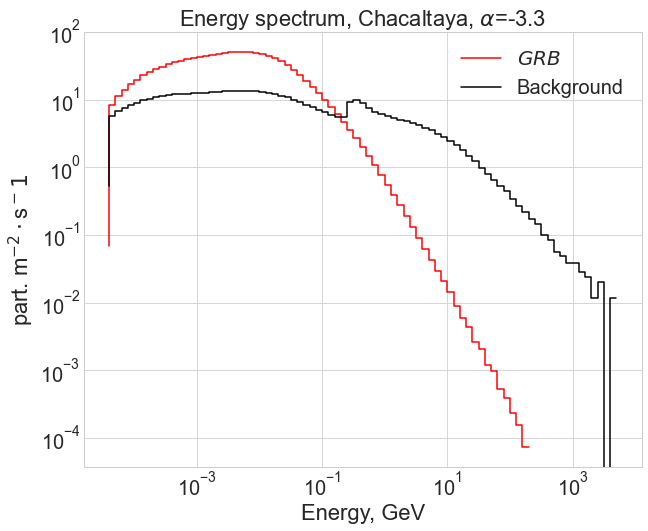

In [51]:
plt.figure(figsize=(10,8))
plt.step(du3["p_in_bin(GeV)"], ggg123/50000, c="r", label=r"$GRB$")

plt.step(dc["p_in_bin(GeV)"], np.sqrt(dc["Total_per_bin"]/7200), c="k", label=r"Background")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, Chacaltaya, $\alpha$=-3.3", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

In [52]:
du_x=du3["p_in_bin(GeV)"]
du_y=(du1["Total_per_bin"]*0.8292 + du2["Total_per_bin"]*0.1492 +du3["Total_per_bin"]*0.0266)/50000
du_z=[]
norm(du_x, du_y, du_z)

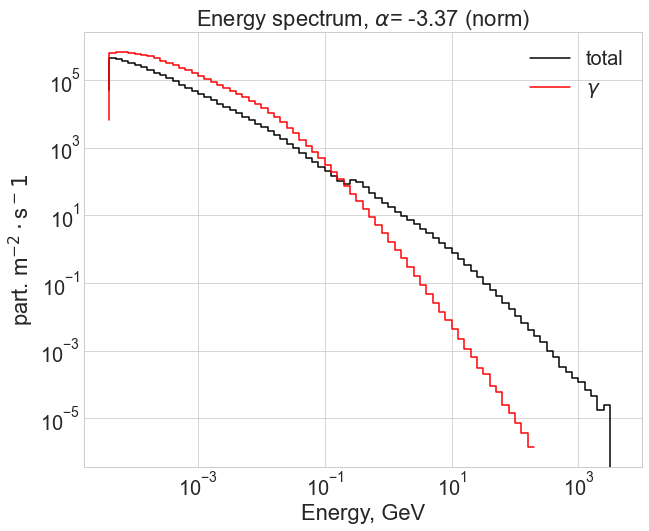

In [53]:
plt.figure(figsize=(10,8))

plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")
plt.step(du3["p_in_bin(GeV)"][:-1], du_z, c="r", label=r"$\gamma$")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Energy spectrum, $\alpha$= -3.37 (norm)", fontsize=22)
plt.xlabel(r"Energy, GeV")
plt.ylabel(r"part. m$^{-2}\cdot$s$^-1$")
plt.legend(fontsize=20)

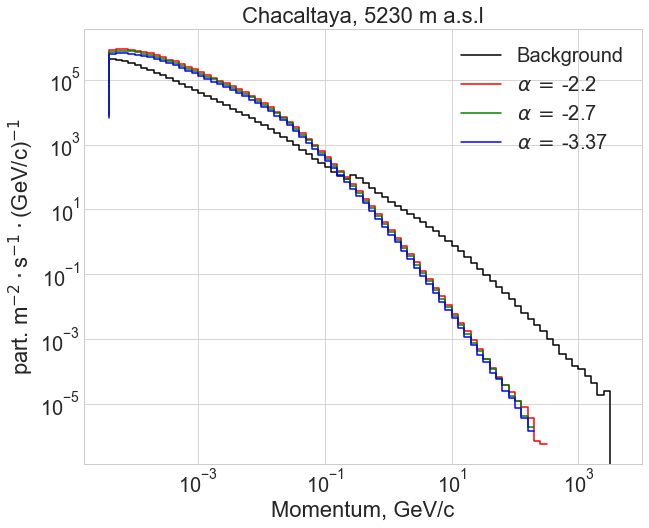

In [107]:
plt.figure(figsize=(10,8))

plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"Background")
plt.step(ds3["p_in_bin(GeV)"][:-1], ds_z, c="r", label=r"$\alpha\,=\,$-2.2")
plt.step(dt3["p_in_bin(GeV)"][:-1], dt_z, c="g", label=r"$\alpha\,=\,$-2.7")
plt.step(du3["p_in_bin(GeV)"][:-1], du_z, c="b", label=r"$\alpha\,=\,$-3.37")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Chacaltaya, 5230 m a.s.l", fontsize=22)
plt.xlabel(r"Momentum, GeV/c")
plt.ylabel(r"part. m$^{-2}\cdot$s$^{-1}\cdot$(GeV/c)$^{-1}$")
plt.legend(fontsize=20)

In [55]:
x=np.linspace(1, 10, 10)
y=np.linspace(11, 20, 10)

In [56]:
print(len(x), len(y))

10 10


In [57]:
z=[]
for i in range(0, len(x)-1):
    k=y[i]/(x[i+1]-x[i])
    z.append(k)

In [58]:
print(z, len(z))

[11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0] 9


In [59]:
de_220=pd.read_csv(r"cha_220_200_1000/100000.pri.bz2", delimiter=" ")
de_270=pd.read_csv(r"cha_270_200_1000/100000.pri.bz2", delimiter=" ")
de_337=pd.read_csv(r"cha_337_200_1000/100000.pri.bz2", delimiter=" ")

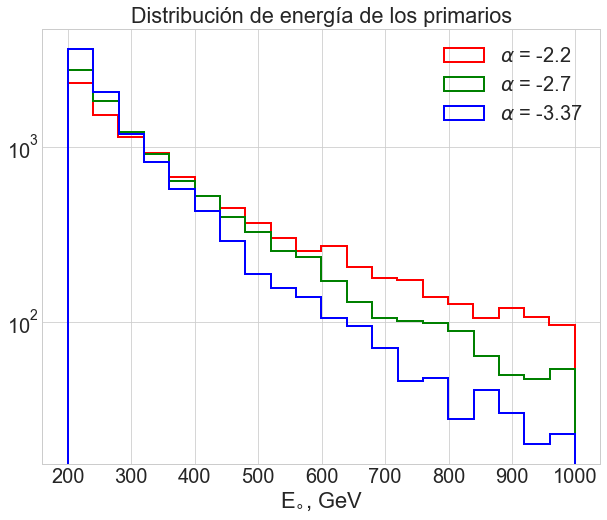

In [60]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
plt.hist(de_220["prm_energy"], bins=20, histtype='step', color="r", linewidth=2, fill=False, label=r"$\alpha$ = -2.2");
plt.hist(de_270["prm_energy"], bins=20, histtype='step', color="g", linewidth=2, fill=False, label=r"$\alpha$ = -2.7");
plt.hist(de_337["prm_energy"], bins=20, histtype='step', color="b", linewidth=2, fill=False, label=r"$\alpha$ = -3.37");
#plt.xscale("log")
plt.yscale("log")
plt.title("Distribución de energía de los primarios")
plt.xlabel(r"E$_{\circ}$, GeV")
plt.legend(fontsize=20)
plt.show()

In [61]:
dk_220_1=de_220[de_220["prm_energy"]<=400]
dk_220_2=de_220[(de_220["prm_energy"]>400) & (de_220["prm_energy"]<=700)]
dk_220_3=de_220[(de_220["prm_energy"]>700) & (de_220["prm_energy"]<=1000)]

In [62]:
print(len(dk_220_1), len(dk_220_2), len(dk_220_3))

6586 2468 946


In [63]:
dk_270_1=de_270[de_270["prm_energy"]<=400]
dk_270_2=de_270[(de_270["prm_energy"]>400) & (de_270["prm_energy"]<=700)]
dk_270_3=de_270[(de_270["prm_energy"]>700) & (de_270["prm_energy"]<=1000)]

In [64]:
print(len(dk_270_1), len(dk_220_2), len(dk_270_3))

7353 2468 558


In [65]:
dk_337_1=de_337[de_337["prm_energy"]<=400]
dk_337_2=de_337[(de_337["prm_energy"]>400) & (de_337["prm_energy"]<=700)]
dk_337_3=de_337[(de_337["prm_energy"]>700) & (de_337["prm_energy"]<=1000)]

In [66]:
print(len(dk_337_1), len(dk_337_2), len(dk_337_3))

8292 1442 266


# Apex 

In [67]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasApex")
os.getcwd()

'/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasApex'

## Flujo de fondo

In [68]:
daf=pd.read_csv(r"salida_apex_flujo.hst", delimiter=" ")

In [69]:
daf_x=daf["p_in_bin(GeV)"]
daf_y=np.sqrt(daf["Total_per_bin"]/7200)
daf_z=[]
norm(daf_x, daf_y, daf_z)

## $\alpha$ = -2.2

In [70]:
# 6586 2468 946

In [71]:
da1_220=pd.read_csv(r"salida_apx_22_200_400.hst", delimiter=" ")
da2_220=pd.read_csv(r"salida_apx_22_400_700.hst", delimiter=" ")
da3_220=pd.read_csv(r"salida_apx_22_700_1000.hst", delimiter=" ")

In [72]:
da_x_220=da3_220["p_in_bin(GeV)"]
da_y_220=(da1_220["Total_per_bin"]*0.6586 + da2_220["Total_per_bin"]*0.2468 +da3_220["Total_per_bin"]*0.0946)/50000
da_z_220=[]
norm(da_x_220, da_y_220, da_z_220)

## $\alpha$ = -2.7

In [73]:
# 7353 2468 558

In [74]:
da1_270=pd.read_csv(r"salida_apx_270_200_400.hst", delimiter=" ")
da2_270=pd.read_csv(r"salida_apx_270_400_700.hst", delimiter=" ")
da3_270=pd.read_csv(r"salida_apx_270_700_1000.hst", delimiter=" ")

In [75]:
da_x_270=da3_270["p_in_bin(GeV)"]
da_y_270=(da1_270["Total_per_bin"]*0.7353 + da2_270["Total_per_bin"]*0.2468 +da3_270["Total_per_bin"]*0.0558)/50000
da_z_270=[]
norm(da_x_270, da_y_270, da_z_270)

## $\alpha$ = -3.37

In [76]:
# 8292 1442 266

In [77]:
da1_337=pd.read_csv(r"salida_apx_33_200_400.hst", delimiter=" ")
da2_337=pd.read_csv(r"salida_apx_33_400_700.hst", delimiter=" ")
da3_337=pd.read_csv(r"salida_apx_33_700_1000.hst", delimiter=" ")

In [78]:
da_x_337=da3_337["p_in_bin(GeV)"]
da_y_337=(da1_337["Total_per_bin"]*0.8292 + da2_337["Total_per_bin"]*0.1442 +da3_337["Total_per_bin"]*0.0266)/50000
da_z_337=[]
norm(da_x_337, da_y_337, da_z_337)

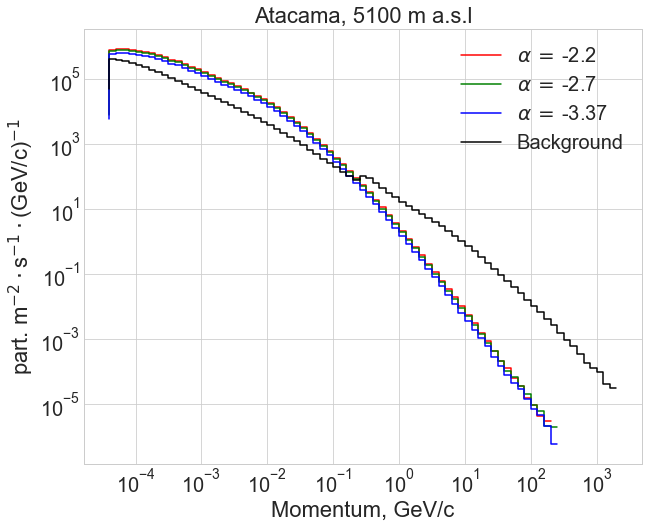

In [79]:
plt.figure(figsize=(10,8))

#plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")
plt.step(da3_220["p_in_bin(GeV)"][:-1], da_z_220, c="r", label=r"$\alpha\,=\,$-2.2")
plt.step(da3_270["p_in_bin(GeV)"][:-1], da_z_270, c="g", label=r"$\alpha\,=\,$-2.7")
plt.step(da3_337["p_in_bin(GeV)"][:-1], da_z_337, c="b", label=r"$\alpha\,=\,$-3.37")

plt.step(daf["p_in_bin(GeV)"][:-1], daf_z, c="k", label=r"Background")


plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"Atacama, 5100 m a.s.l", fontsize=22)
plt.xlabel(r"Momentum, GeV/c")
plt.ylabel(r"part. m$^{-2}\cdot$s$^{-1}\cdot$(GeV/c)$^{-1}$")
plt.legend(fontsize=20)

# San Antonio de los cobres

In [80]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasSac")
os.getcwd()

'/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasSac'

## Flujo de fondo

In [81]:
dsf=pd.read_csv(r"salida_flujo_sac.hst", delimiter=" ")

In [82]:
dsf_x=dsf["p_in_bin(GeV)"]
dsf_y=np.sqrt(dsf["Total_per_bin"]/7200)
dsf_z=[]
norm(dsf_x, dsf_y, dsf_z)

## $\alpha$ = -2.2

In [83]:
# 6586 2468 946

In [84]:
ds1_220=pd.read_csv(r"salida_sac_22_200_400.hst", delimiter=" ")
ds2_220=pd.read_csv(r"salida_sac_22_400_700.hst", delimiter=" ")
ds3_220=pd.read_csv(r"salida_sac_22_700_1000.hst", delimiter=" ")

In [85]:
ds_x_220=ds3_220["p_in_bin(GeV)"]
ds_y_220=(ds1_220["Total_per_bin"]*0.6586 + ds2_220["Total_per_bin"]*0.2468 +ds3_220["Total_per_bin"]*0.0946)/50000
ds_z_220=[]
norm(ds_x_220, ds_y_220, ds_z_220)

## $\alpha$ = -2.7

In [86]:
# 7353 2468 558

In [87]:
ds1_270=pd.read_csv(r"salida_sac_27_200_400.hst", delimiter=" ")
ds2_270=pd.read_csv(r"salida_sac_27_400_700.hst", delimiter=" ")
ds3_270=pd.read_csv(r"salida_sac_27_700_1000.hst", delimiter=" ")

In [88]:
ds_x_270=ds3_270["p_in_bin(GeV)"]
ds_y_270=(ds1_270["Total_per_bin"]*0.7353 + ds2_270["Total_per_bin"]*0.2468 +ds3_270["Total_per_bin"]*0.0558)/50000
ds_z_270=[]
norm(ds_x_270, ds_y_270, ds_z_270)

## $\alpha$ = -3.37

In [89]:
# 8292 1442 266

In [90]:
ds1_337=pd.read_csv(r"salida_sac_33_200_400.hst", delimiter=" ")
ds2_337=pd.read_csv(r"salida_sac_33_400_700.hst", delimiter=" ")
ds3_337=pd.read_csv(r"salida_sac_33_700_1000.hst", delimiter=" ")

In [91]:
ds_x_337=ds3_337["p_in_bin(GeV)"]
ds_y_337=(ds1_337["Total_per_bin"]*0.8292 + ds2_337["Total_per_bin"]*0.1442 +ds3_337["Total_per_bin"]*0.0266)/50000
ds_z_337=[]
norm(ds_x_337, ds_y_337, ds_z_337)

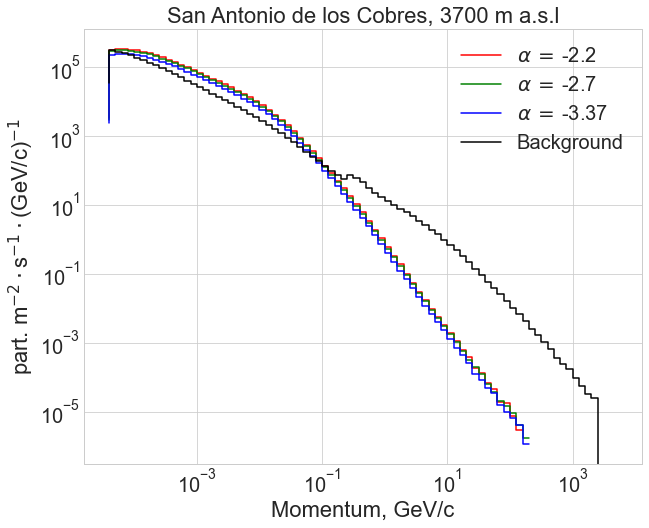

In [92]:
plt.figure(figsize=(10,8))

#plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")
plt.step(ds3_220["p_in_bin(GeV)"][:-1], ds_z_220, c="r", label=r"$\alpha\,=\,$-2.2")
plt.step(ds3_270["p_in_bin(GeV)"][:-1], ds_z_270, c="g", label=r"$\alpha\,=\,$-2.7")
plt.step(ds3_337["p_in_bin(GeV)"][:-1], ds_z_337, c="b", label=r"$\alpha\,=\,$-3.37")

plt.step(dsf["p_in_bin(GeV)"][:-1], dsf_z, c="k", label=r"Background")

plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"San Antonio de los Cobres, 3700 m a.s.l", fontsize=22)
plt.xlabel(r"Momentum, GeV/c")
plt.ylabel(r"part. m$^{-2}\cdot$s$^{-1}\cdot$(GeV/c)$^{-1}$")
plt.legend(fontsize=20)

# Chimborazo

In [93]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasRbm")
os.getcwd()

'/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/simulacionesDiffAlfasRbm'

## Flujo de fondo

In [94]:
drf=pd.read_csv(r"salida_flujo_rbm.hst", delimiter=" ")

In [95]:
drf_x=drf["p_in_bin(GeV)"]
drf_y=np.sqrt(drf["Total_per_bin"]/7200)
drf_z=[]
norm(drf_x, drf_y, drf_z)

## $\alpha$ = -2.2

In [96]:
# 6586 2468 946

In [97]:
dr1_220=pd.read_csv(r"salida_rbm_22_200_400.hst", delimiter=" ")
dr2_220=pd.read_csv(r"salida_rbm_22_400_700.hst", delimiter=" ")
dr3_220=pd.read_csv(r"salida_rbm_22_700_1000.hst", delimiter=" ")

In [98]:
dr_x_220=dr3_220["p_in_bin(GeV)"]
dr_y_220=(dr1_220["Total_per_bin"]*0.6586 + dr2_220["Total_per_bin"]*0.2468 +dr3_220["Total_per_bin"]*0.0946)/50000
dr_z_220=[]
norm(dr_x_220, dr_y_220, dr_z_220)

## $\alpha$ = -2.7

In [99]:
# 7353 2468 558

In [100]:
dr1_270=pd.read_csv(r"salida_rbm_27_200_400.hst", delimiter=" ")
dr2_270=pd.read_csv(r"salida_rbm_27_400_700.hst", delimiter=" ")
dr3_270=pd.read_csv(r"salida_rbm_27_700_1000.hst", delimiter=" ")

In [101]:
dr_x_270=dr3_270["p_in_bin(GeV)"]
dr_y_270=(dr1_270["Total_per_bin"]*0.7353 + dr2_270["Total_per_bin"]*0.2468 +dr3_270["Total_per_bin"]*0.0558)/50000
dr_z_270=[]
norm(dr_x_270, dr_y_270, dr_z_270)

## $\alpha$ = -3.37

In [102]:
# 8292 1442 266

In [103]:
dr1_337=pd.read_csv(r"salida_rbm_33_200_400.hst", delimiter=" ")
dr2_337=pd.read_csv(r"salida_rbm_33_400_700.hst", delimiter=" ")
dr3_337=pd.read_csv(r"salida_rbm_33_700_1000.hst", delimiter=" ")

In [104]:
dr_x_337=dr3_337["p_in_bin(GeV)"]
dr_y_337=(dr1_337["Total_per_bin"]*0.8292 + dr2_337["Total_per_bin"]*0.1442 +dr3_337["Total_per_bin"]*0.0266)/50000
dr_z_337=[]
norm(dr_x_337, dr_y_337, dr_z_337)

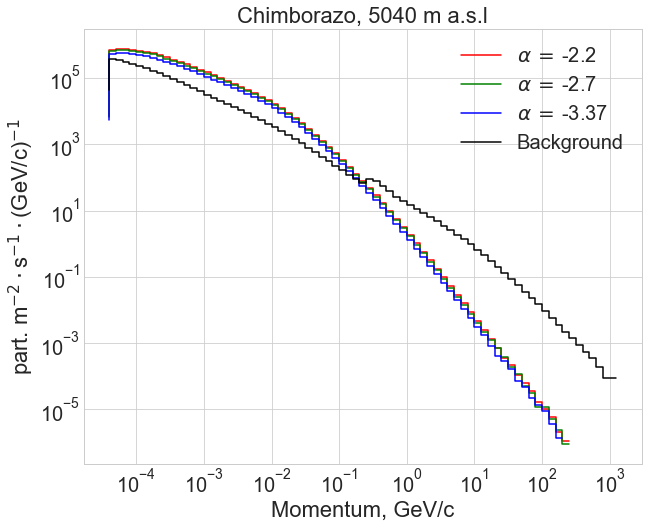

In [105]:
plt.figure(figsize=(10,8))

#plt.step(dc["p_in_bin(GeV)"][:-1], dc_z, c="k", label=r"total")
plt.step(dr3_220["p_in_bin(GeV)"][:-1], dr_z_220, c="r", label=r"$\alpha\,=\,$-2.2")
plt.step(dr3_270["p_in_bin(GeV)"][:-1], dr_z_270, c="g", label=r"$\alpha\,=\,$-2.7")
plt.step(dr3_337["p_in_bin(GeV)"][:-1], dr_z_337, c="b", label=r"$\alpha\,=\,$-3.37")

plt.step(drf["p_in_bin(GeV)"][:-1], drf_z, c="k", label=r"Background")

plt.xscale("log")
plt.yscale("log")
plt.title(r"Chimborazo, 5040 m a.s.l", fontsize=22)
plt.xlabel(r"Momentum, GeV/c")
plt.ylabel(r"part. m$^{-2}\cdot$s$^{-1}\cdot$(GeV/c)$^{-1}$")
plt.legend(fontsize=20)